### Professor Brendon Epps at Dartmouth has pointed out an error in the original LDVM formulation. There is a  correction to the forces/moments resulting from the shear layer at the leading edge. The effects of this correction on the 2DOF response are studied here. 

#### The following changes result from the correction:
* The derivatives of Fourier coefficients are calculated after the 2D N-R iteration
* An additional noncirulatory contribution is added to the normal force - $$\frac{2}{U_{ref}^2} \frac{\Gamma_{lev}^n}{\Delta t}$$
where $\Gamma_{lev}^n$ is the strength of LEV shed at the current time step
* An additional noncirulatory contribution is added to the pitching moment - $$\frac{1}{U_{ref}^2} \frac{\Gamma_{lev}^n}{\Delta t}(2x_{ref}-1)$$

### Test this for published examples and compare against original LDVM

In [2]:
#Include the UNSflow libraries
#Pkg.clone("git://github.com/KiranUofG/UNSflow")
include("../src/UNSflow.jl")
using UNSflow

  likely near /home/kiran/.julia/v0.5/IJulia/src/kernel.jl:35
  likely near /home/kiran/.julia/v0.5/IJulia/src/kernel.jl:35
  likely near /home/kiran/.julia/v0.5/IJulia/src/kernel.jl:35


In [21]:
alpha_init = 10*pi/180
alphadot_init = 0.
h_init = 0.
hdot_init = 0.
u = 0.4667
udot = 0

kinem = KinemPar2DOF(alpha_init, h_init, alphadot_init, hdot_init, u, udot, 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.)

x_alpha = 0.05
r_alpha = 0.5
kappa = 0.05
w_alpha = 1.
w_h = 1.
w_alphadot = 0.
w_hdot = 1.
cubic_h_1 = 1.
cubic_h_3 = 0.
cubic_alpha_1 = 1.
cubic_alpha_3 = 0.

strpar = TwoDOFPar(x_alpha, r_alpha, kappa, w_alpha, w_h, w_alphadot, w_hdot, cubic_h_1, cubic_h_3, cubic_alpha_1, cubic_alpha_3)

lespcrit = [0.1;]
pvt = 0.35 #1/3 chord

surf = TwoDSurf_2DOF(1., 1., "FlatPlate", pvt, 70, 35, strpar, kinem, lespcrit)

curfield = TwoDFlowField()

del = DelVortDef(1, 500, 10)

dtstar = 0.015
nsteps = 15000

mat, surf, curfield = ldvm(surf, curfield, nsteps, dtstar, del)

kinem = KinemPar2DOF(alpha_init, h_init, alphadot_init, hdot_init, u, udot, 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.)
surf = TwoDSurf_2DOF(1., 1., "FlatPlate", pvt, 70, 35, strpar, kinem, lespcrit)
curfield = TwoDFlowField()

matE, surfE, curfieldE = ldvm_E(surf, curfield, nsteps, dtstar, del)

LoadError: LoadError: MethodError: no method matching calc_forces_E(::UNSflow.TwoDSurf_2DOF, ::Float64, ::Float64)
Closest candidates are:
  calc_forces_E(!Matched::UNSflow.TwoDSurf, ::Float64, ::Float64) at /home/kiran/Documents/Workspace/UNSflow/src/postprocess.jl:75
while loading In[21], in expression starting on line 42

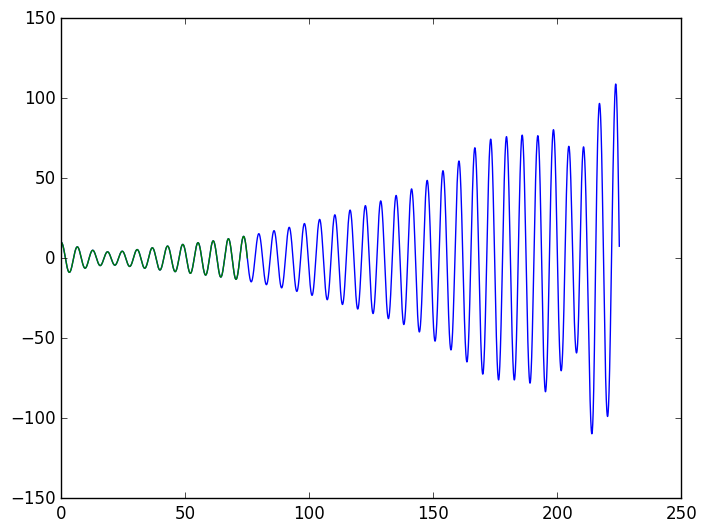

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f5df668c410>

In [22]:
plot(mat[:,1], mat[:,2]*180/pi)
plot(matE[:,1], matE[:,2]*180/pi)

In [8]:
75/0.015


5000.0

In [13]:
matE[end,2]*180/pi

-50.70735059138068